{'Iris-virginica': 2, 'Iris-versicolor': 1, 'Iris-setosa': 0}
       0    1    2    3  4
0    5.1  3.5  1.4  0.2  0
1    4.9  3.0  1.4  0.2  0
2    4.7  3.2  1.3  0.2  0
3    4.6  3.1  1.5  0.2  0
4    5.0  3.6  1.4  0.2  0
5    5.4  3.9  1.7  0.4  0
6    4.6  3.4  1.4  0.3  0
7    5.0  3.4  1.5  0.2  0
8    4.4  2.9  1.4  0.2  0
9    4.9  3.1  1.5  0.1  0
10   5.4  3.7  1.5  0.2  0
11   4.8  3.4  1.6  0.2  0
12   4.8  3.0  1.4  0.1  0
13   4.3  3.0  1.1  0.1  0
14   5.8  4.0  1.2  0.2  0
15   5.7  4.4  1.5  0.4  0
16   5.4  3.9  1.3  0.4  0
17   5.1  3.5  1.4  0.3  0
18   5.7  3.8  1.7  0.3  0
19   5.1  3.8  1.5  0.3  0
20   5.4  3.4  1.7  0.2  0
21   5.1  3.7  1.5  0.4  0
22   4.6  3.6  1.0  0.2  0
23   5.1  3.3  1.7  0.5  0
24   4.8  3.4  1.9  0.2  0
25   5.0  3.0  1.6  0.2  0
26   5.0  3.4  1.6  0.4  0
27   5.2  3.5  1.5  0.2  0
28   5.2  3.4  1.4  0.2  0
29   4.7  3.2  1.6  0.2  0
..   ...  ...  ...  ... ..
120  6.9  3.2  5.7  2.3  2
121  5.6  2.8  4.9  2.0  2
122  7.7  2.8  6.7  

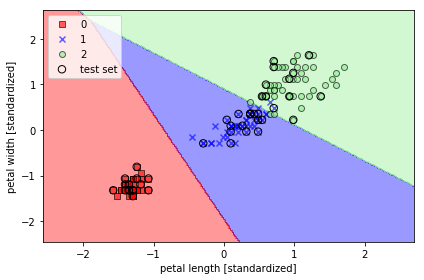

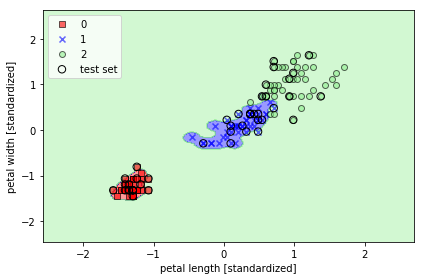

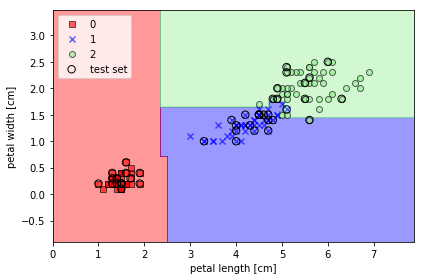

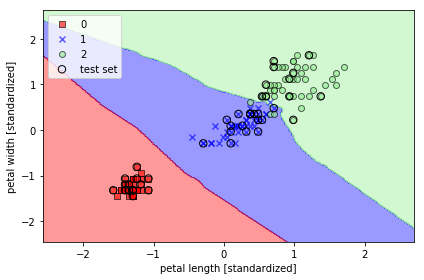

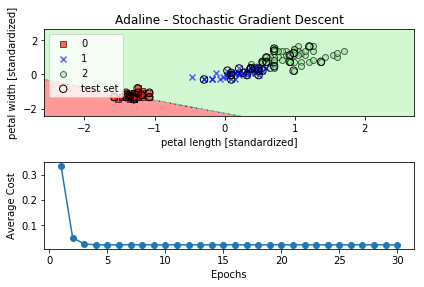

In [5]:
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

#劃出分布圖及分類結果+

#
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
                           
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)
#

import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
                           
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
    
        plt.scatter(X_test[:, 0],
                X_test[:, 1],
                c='',
                alpha=1.0,
                edgecolor='black',
                linewidths=1,
                marker='o',
                s=55, label='test set')
#
#劃出分布圖及分類結果-
#適應線性神經元(Adaline)與隨機梯度下降法+
#
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
        
        Parameters
        ------------
        eta : float
        Learning rate (between 0.0 and 1.0)
        n_iter : int
        Passes over the training dataset.
        
        Attributes
        -----------
        w_ : 1d-array
        Weights after fitting.
        cost_ : list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch.
        shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
        random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        
        Returns
        -------
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
#
#載入iris data+
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

class_mapping = {label:idx for idx,label in enumerate(np.unique(df[4]))}
print(class_mapping)
df[4] = df[4].map(class_mapping)

print(df)

#行4是Iris 種類，前50個是 Iris-setosa 後50個是Iris-versicolor,最後50個是Iris-virginica
y = df.iloc[:, 4].values

print(y)

X = df.iloc[:, [2, 3]].values

############
# Logistic
############

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('/Users/cesare.chung/Desktop/_logistic_regression.png', dpi=300)
plt.show()

############
# SVC
############

from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('/Users/cesare.chung/Desktop/_support_vector_machine_linear.png', dpi=300)
plt.show()

############
# RF
############

from sklearn.ensemble import RandomForestClassifier

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('/Users/cesare.chung/Desktop/_random_forest.png', dpi=300)
plt.show()

############
# KNN
############

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('/Users/cesare.chung/Desktop/_k_nearest_neighbors.png', dpi=300)
plt.show()

############

#使用AdalineSGD classifier，設定疊代n_iter輪，學習率eta=0.01，隨機種子random_state
ada = AdalineSGD(n_iter=30, eta=0.01, shuffle=True,random_state=1)
#輸入標準常態化的樣本X_std及期望輸出y
ada.fit(X_train_std, y_train)

#劃出決策分布圖
plt.subplot(211)
#plot_decision_regions(X_train_std, y_train, classifier=ada)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=ada, test_idx=range(105, 150))

plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

#劃出loss
plt.subplot(212)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.savefig('/Users/cesare.chung/Desktop/_adaSGD.png', dpi=300)
plt.show()






